In [1]:
import pandas as pd
from stock import Stock

# importing matplotlib module 
from matplotlib import pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#https://medium.com/codex/how-to-calculate-bollinger-bands-of-a-stock-with-python-f9f7d1184fc3

In [26]:
bot = Stock('MSFT',time_period='5y')
bot.stock_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-06-05,67.410979,68.272699,67.261111,67.701340,33316800,0.0,0
2017-06-06,67.720067,68.019796,67.691961,67.926125,31511100,0.0,0
2017-06-07,68.038546,68.160308,67.392252,67.804382,22301800,0.0,0
2017-06-08,67.916773,67.926135,66.970751,67.392242,24588300,0.0,0
2017-06-09,67.476555,67.514022,64.245094,65.865509,49187400,0.0,0
...,...,...,...,...,...,...,...
2022-05-27,268.480011,273.339996,267.559998,273.239990,26910800,0.0,0
2022-05-31,272.529999,274.769989,268.929993,271.869995,37827700,0.0,0
2022-06-01,275.200012,277.690002,270.040009,272.420013,25292200,0.0,0


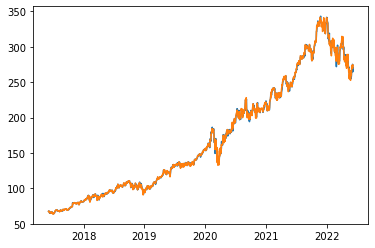

In [8]:
plt.plot(bot.stock_data['Open'])
plt.plot(bot.stock_data['Close'])

In [16]:
bot.get_sma_(t=50)
bot.get_sma_(t=200)
bot.get_cma_()
bot.get_ema_(t=50)
bot.get_ema_(t=200)

I already have 50 day SMA.
I already have 200 day SMA.
I already have CMA.
Got 50 day EMA.
Got 200 day EMA.


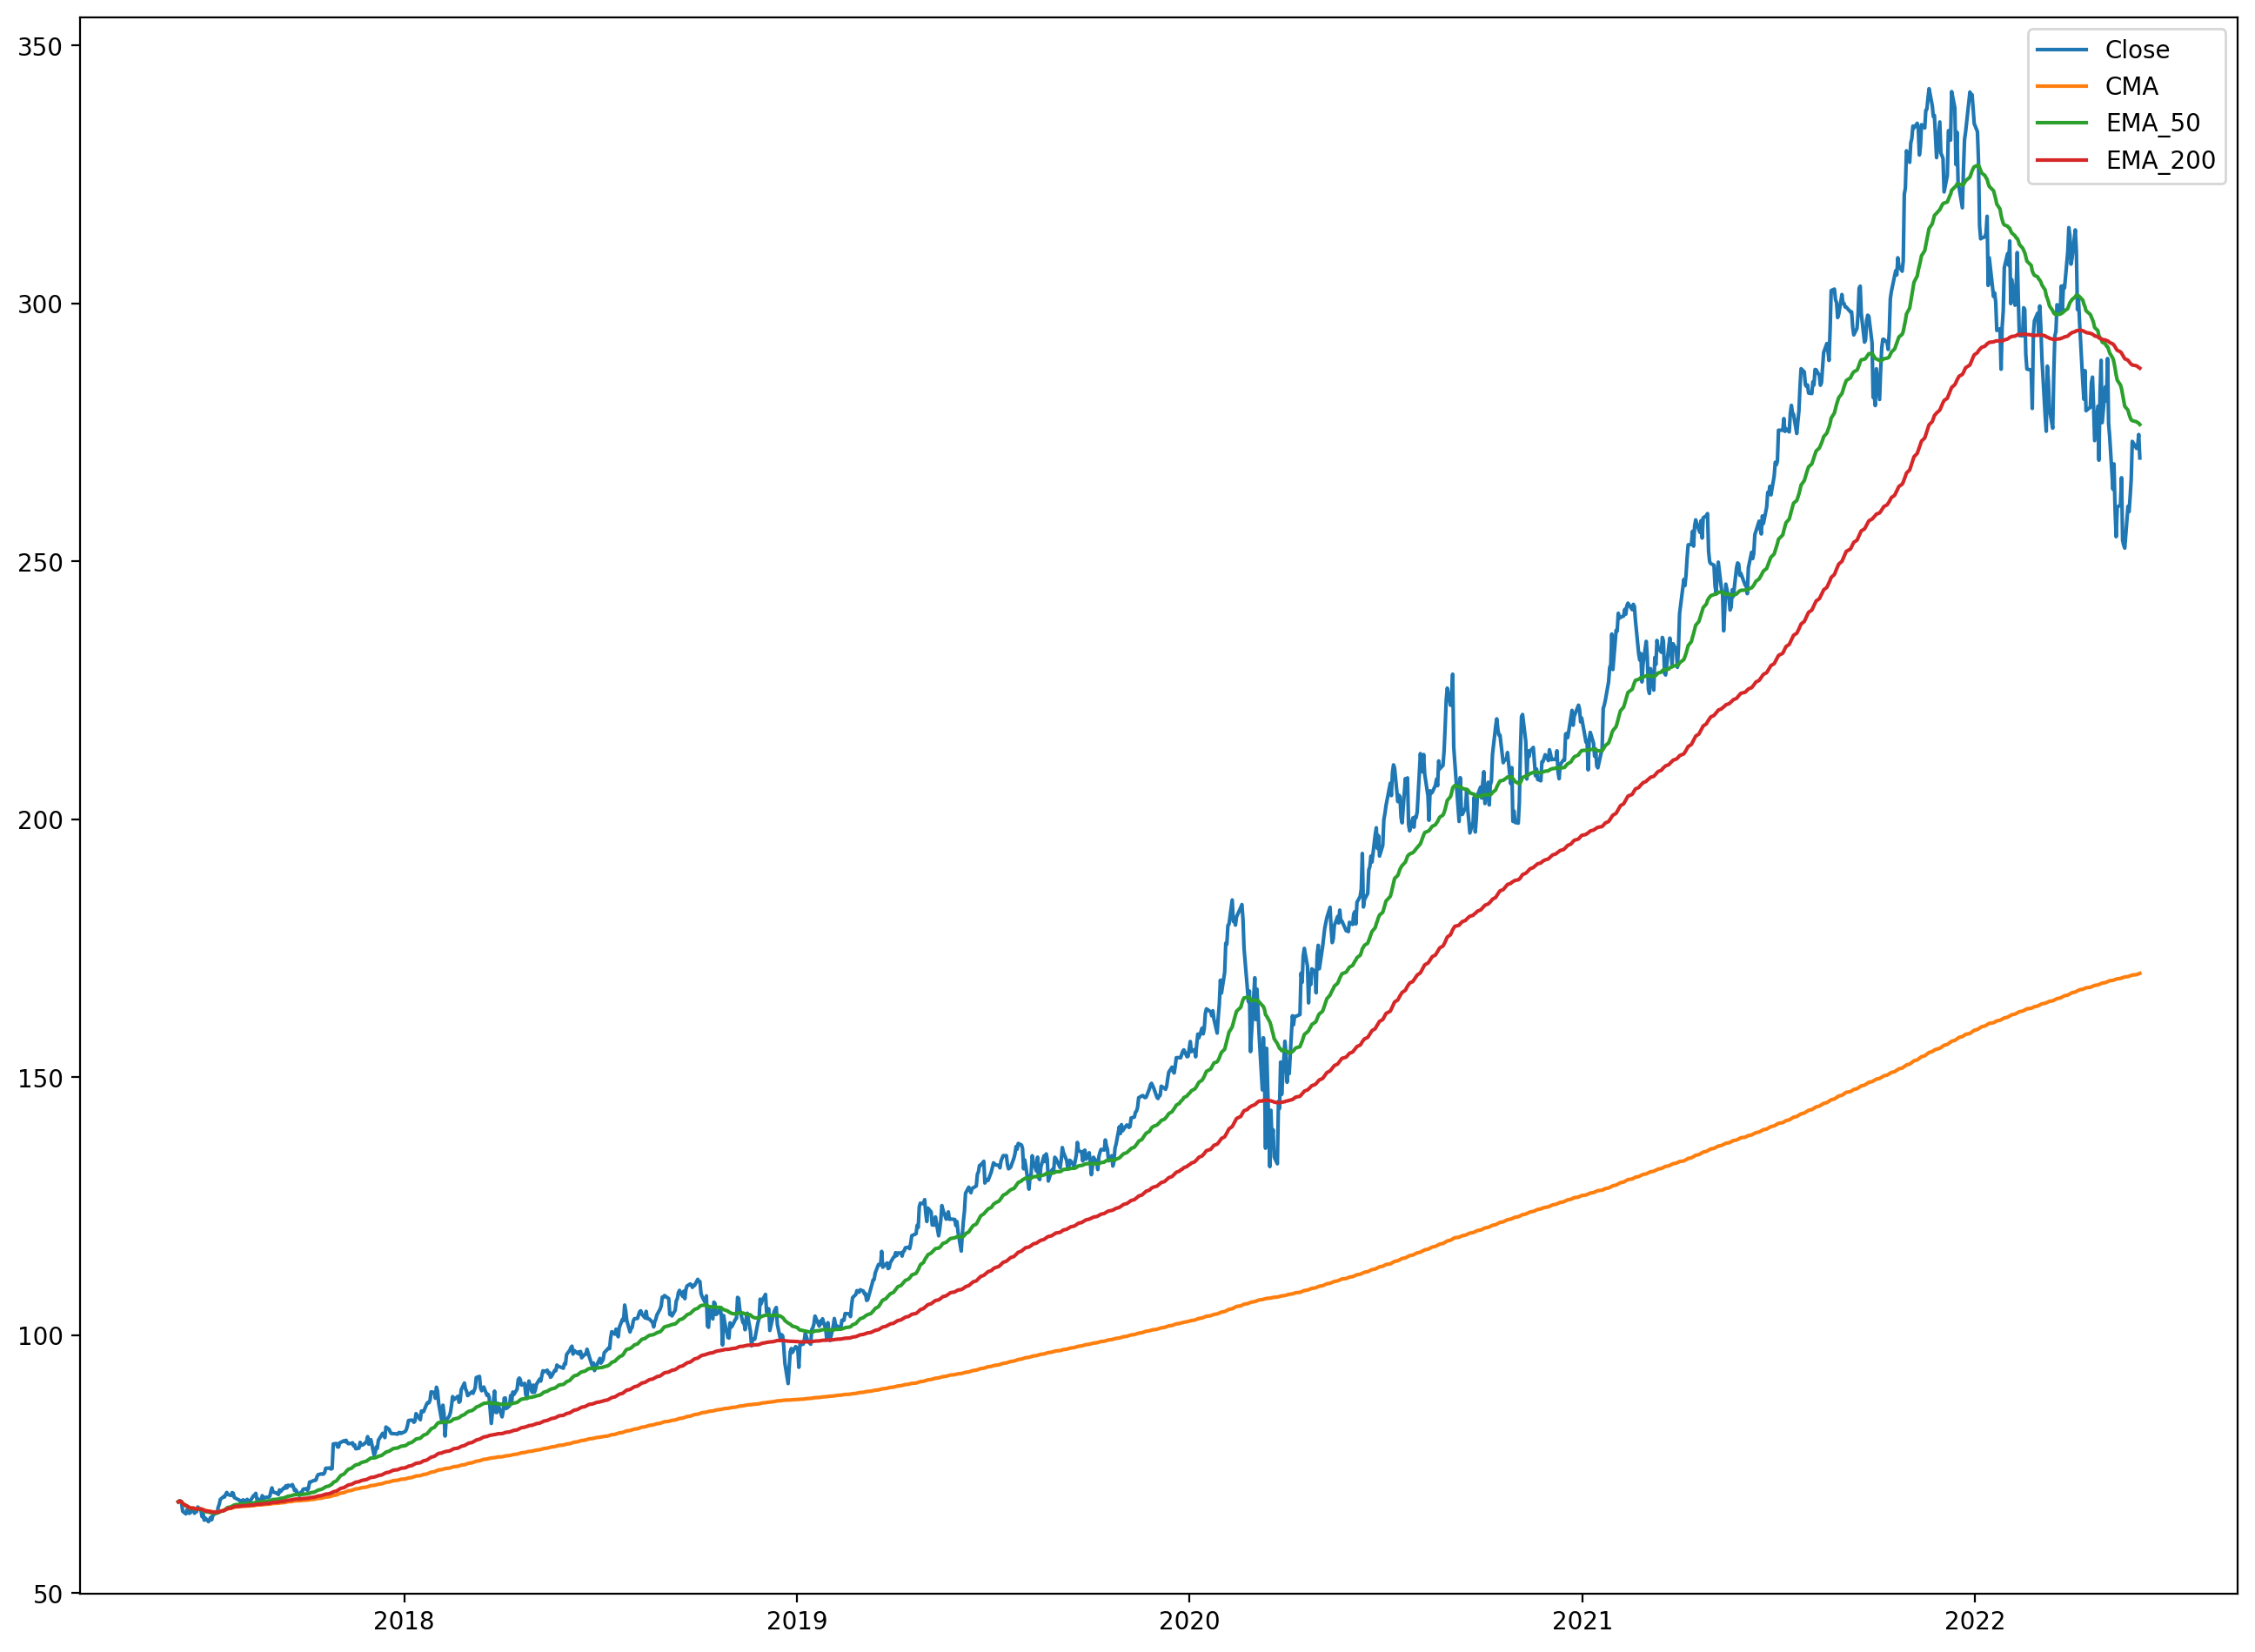

In [25]:
plt.figure(figsize=(16, 12), dpi=200)
cols_to_plot = ['Close', 'CMA', 'EMA_50','EMA_200']
for col in cols_to_plot:
    plt.plot(bot.stock_data[col], label=col)
plt.legend()

In [42]:
#price_hist.index[0] + pd.Timedelta(days=1)

Timestamp('2019-06-04 00:00:00')

In [98]:
# diff_hist has rows where sma_50 < sma_200
price_hist = price_hist.reset_index(level=0)
diff_hist = price_hist[price_hist['SMA_50'] < price_hist['SMA_200']]

In [124]:
diff_hist

,index,Date,Close,SMA_50,SMA_200
426,426,2019-02-12,102.909012,100.824645,100.831177
427,427,2019-02-13,102.831985,100.759563,100.889799
428,428,2019-02-14,102.918648,100.682735,100.959790
429,429,2019-02-15,104.189484,100.608218,101.029098
430,430,2019-02-19,104.141350,100.601478,101.105249
...,...,...,...,...,...
1254,1254,2022-05-25,262.519989,283.717449,302.015759
1255,1255,2022-05-26,265.899994,283.161331,301.922129
1256,1256,2022-05-27,273.239990,282.735450,301.851015
1257,1257,2022-05-31,271.869995,282.178213,301.757975


### First intersection going down (SMA_50 < SMA_200)
#### This means SELL

In [102]:
# we already have the rows where the faster sma is lower than the faster sma
# we now want to get the first non-consecutive occurence of the intersect
# in other words we don't want the whole time period where one sma < other sma, we only want the first days to know when it started
diff_group = (diff_hist['index'] != diff_hist.shift()['index']+1).cumsum().rename('group')
diff_group

426     1
427     1
428     1
429     1
430     1
       ..
1254    2
1255    2
1256    2
1257    2
1258    2
Name: group, Length: 70, dtype: int64

In [121]:
diff_hist.groupby([diff_group], as_index=False).first()

,index,Date,Close,SMA_50,SMA_200
0,426,2019-02-12,102.909012,100.824645,100.831177
1,1205,2022-03-16,293.705933,298.202045,298.887038


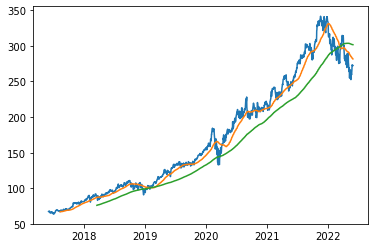

In [127]:
plt.plot(price_hist['Date'], price_hist['Close'])
plt.plot(price_hist['Date'], price_hist['SMA_50'])
plt.plot(price_hist['Date'], price_hist['SMA_200'])

### Correctly shows the downward interections in 2019 and right now.